In [1]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [3]:
train_house = pd.read_csv('C:\\Users\\927278\\Documents\\House Prices Kaggle\\train.csv')
test_house = pd.read_csv('C:\\Users\\927278\\Documents\\House Prices Kaggle\\test.csv')

In [93]:
#Test if ExterQual, CentralAir is correlated to SalePrice
newdf = pd.DataFrame
newdf = train_house[['ExterQual','SalePrice','CentralAir']]
di = {'TA':2,'Gd':3,'Ex':4,'Fa':1}
di2 = {'Y':1,'N':0}
newdf['ExterQual'] = newdf['ExterQual'].replace(di)
newdf['CentralAir'] = newdf['CentralAir'].replace(di2)
newdf.corr()

C:\Users\927278\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\927278\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,ExterQual,SalePrice,CentralAir
ExterQual,1.000000,0.682639,0.206112
SalePrice,0.682639,1.000000,0.251328
CentralAir,0.206112,0.251328,1.000000


In [94]:
newdf.ExterQual.value_counts()

2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64

In [63]:
#print(train_house.tail())
train_house.corr().sort_values(by='SalePrice',ascending = False).SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
#Check all correlations between SalePrice and 
plt.figure(figsize = (12, 10))
train_house.corr()['SalePrice'].sort_values(ascending = False).plot(kind = 'bar')

In [5]:
test_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


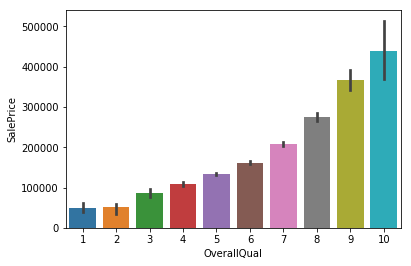

In [6]:
sns.barplot(train_house.OverallQual,train_house.SalePrice)

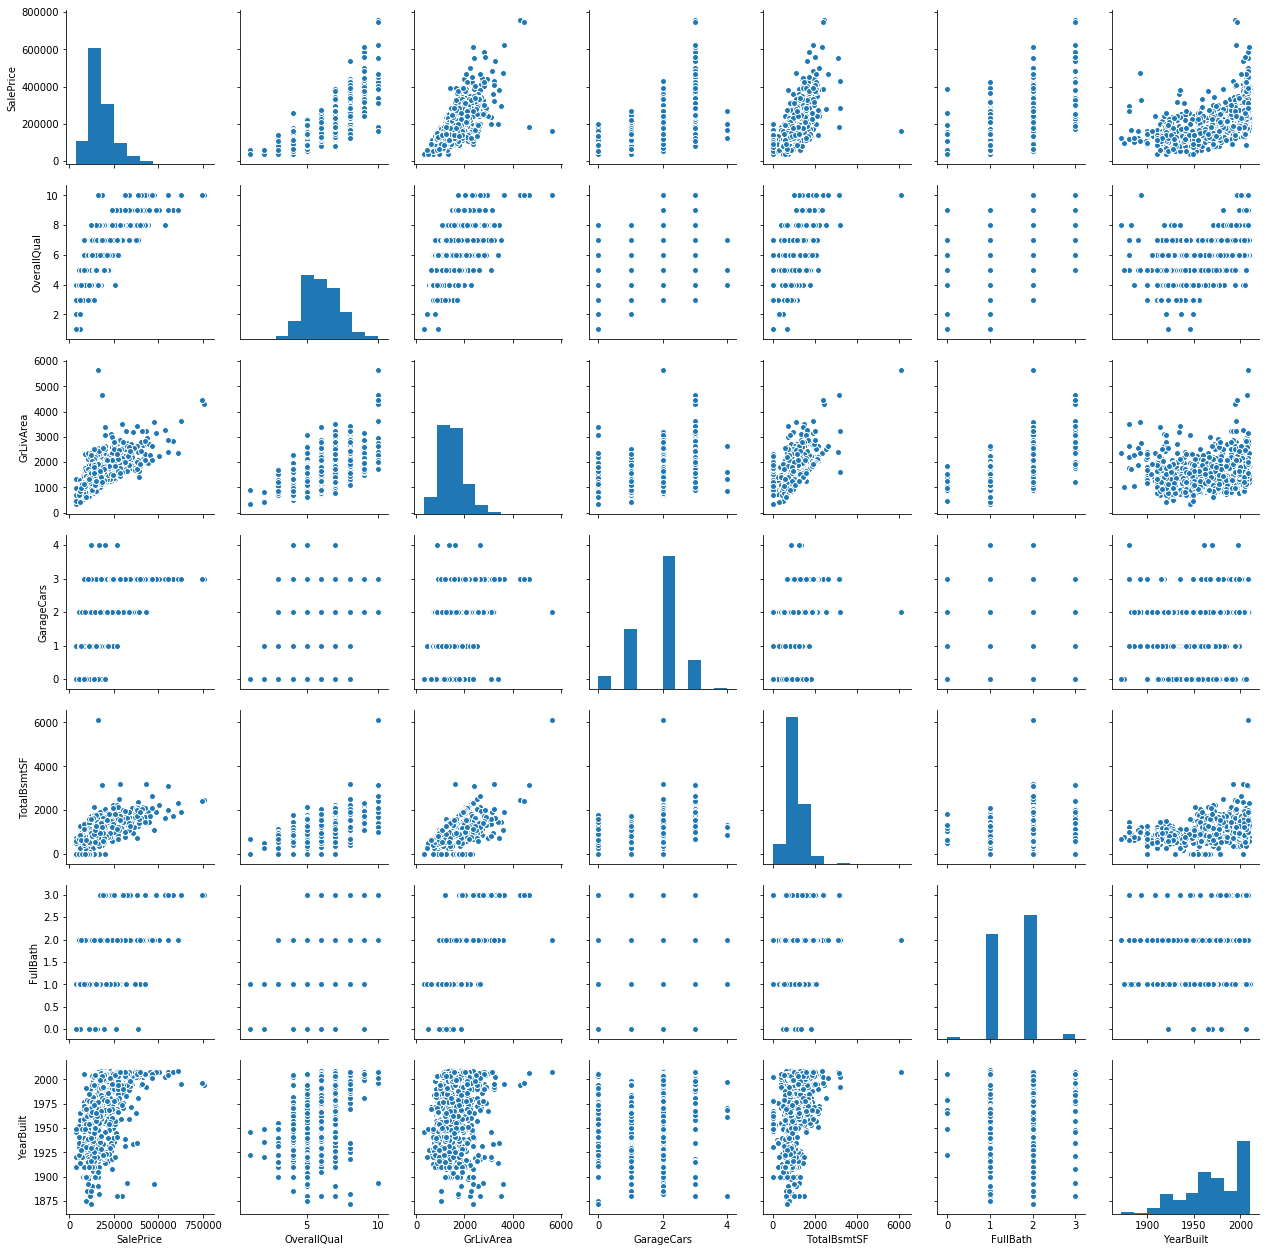

In [7]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_house[cols])

In [8]:
test_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
all_house = pd.concat([train_house, test_house],axis = 0)
all_house.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [10]:
all_house.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

In [11]:
reduced = all_house[['Id','SalePrice','MSZoning','LotArea','OverallQual','OverallCond','TotRmsAbvGrd','YrSold','SaleType']]

reduced['MSZoning'].fillna(value='RL',inplace=True)
reduced['SaleType'].fillna(value='WD',inplace=True)
reduced.head()

C:\Users\927278\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Id,SalePrice,MSZoning,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,YrSold,SaleType
0,1,208500.0,RL,8450,7,5,8,2008,WD
1,2,181500.0,RL,9600,6,8,6,2007,WD
2,3,223500.0,RL,11250,7,5,6,2008,WD
3,4,140000.0,RL,9550,7,5,7,2006,WD
4,5,250000.0,RL,14260,8,5,9,2008,WD


In [12]:
reduced.isnull().sum()

Id                 0
SalePrice       1459
MSZoning           0
LotArea            0
OverallQual        0
OverallCond        0
TotRmsAbvGrd       0
YrSold             0
SaleType           0
dtype: int64

In [13]:
reduced.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [14]:
reduced.SaleType.value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [16]:
year = pd.get_dummies(reduced['YrSold'],drop_first=True)
saletype = pd.get_dummies(reduced['SaleType'],drop_first=True)
mszone = pd.get_dummies(reduced['MSZoning'],drop_first=True)

In [17]:
#Leave SaleType and MSZoning out as they don't bring any value to the algorithm due to having mostly the same values
#final_full = pd.concat([reduced.drop(columns=['Id','SalePrice','YrSold','SaleType','MSZoning']),year,saletype,mszone],axis=1)
final_full = pd.concat([reduced.drop(columns=['Id','SalePrice','YrSold','SaleType','MSZoning']),year],axis=1)
final_full.tail()

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,2007,2008,2009,2010
1454,1936,4,7,5,0,0,0,0
1455,1894,4,5,6,0,0,0,0
1456,20000,5,7,7,0,0,0,0
1457,10441,5,5,6,0,0,0,0
1458,9627,7,5,9,0,0,0,0


In [19]:
lin_reg= LinearRegression()

In [20]:
from sklearn.preprocessing import normalize, StandardScaler
# Get column names first
names = final_full.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_final = scaler.fit_transform(final_full)
scaled_final = pd.DataFrame(scaled_final, columns=names)

In [21]:
final_train = pd.concat([scaled_final[:1460],reduced.SalePrice[:1460]],axis=1)
final_train.tail()

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,2007,2008,2009,2010,SalePrice
1455,-0.285470,-0.063185,-0.507284,0.349546,1.793936,-0.520373,-0.53364,-0.362485,175000.0
1456,0.381311,-0.063185,0.391237,0.349546,-0.557433,-0.520373,-0.53364,2.758735,210000.0
1457,-0.142806,0.646183,3.086800,1.624153,-0.557433,-0.520373,-0.53364,2.758735,266500.0
1458,-0.057207,-0.772552,0.391237,-0.925062,-0.557433,-0.520373,-0.53364,2.758735,142125.0
1459,-0.029308,-0.772552,0.391237,-0.287758,-0.557433,1.921699,-0.53364,-0.362485,147500.0


In [22]:
final_test = scaled_final[1460:]
final_test.tail()

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,2007,2008,2009,2010
2914,-1.043937,-1.481920,1.289758,-0.925062,-0.557433,-0.520373,-0.53364,-0.362485
2915,-1.049263,-1.481920,-0.507284,-0.287758,-0.557433,-0.520373,-0.53364,-0.362485
2916,1.246808,-0.772552,1.289758,0.349546,-0.557433,-0.520373,-0.53364,-0.362485
2917,0.034605,-0.772552,-0.507284,-0.287758,-0.557433,-0.520373,-0.53364,-0.362485
2918,-0.068620,0.646183,-0.507284,1.624153,-0.557433,-0.520373,-0.53364,-0.362485


In [23]:
X = final_train.drop(columns='SalePrice')
y = final_train.SalePrice

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
predictions = lin_reg.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, root_

In [40]:
print(mean_absolute_error(predictions,y_test))
print(mean_squared_error(predictions,y_test))
#print(mean_squared_log_error(predictions,y_test))
#train_house.SalePrice.mean()


29484.48765810932
2226470440.2753563


In [41]:
lin_reg.predict(final_test)

array([127019.37806442, 177497.55803276, 140396.08236221, ...,
       146198.92074651, 129357.77025753, 233407.23664999])

In [42]:
#Run the test dataset to get predictions for the competition:
submission_pred = lin_reg.predict(final_test)

In [43]:
submission = pd.DataFrame({'Id' : test_house['Id'],
                           'SalePrice' : submission_pred})
submission.tail()

,Id,SalePrice
1454,2915,69752.579209
1455,2916,82187.386200
1456,2917,146198.920747
1457,2918,129357.770258
1458,2919,233407.236650


In [160]:
submission.to_csv('C:/Users/927278/Documents/House Prices Kaggle/submission3.csv')

In [44]:
list1=[]
for i in (50,100,150,200,300,400,500,750,100):
    ranfor = RandomForestClassifier(n_estimators=i)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
    ranfor.fit(X_train,y_train)
    predictions = ranfor.predict(X_test)
    list1.append([i,ranfor.score(X_test,y_test)])

In [45]:
print(list1)
list1[list1[1]==max(list1[1])]

[[50, 0.0045662100456621], [100, 0.00228310502283105], [150, 0.01141552511415525], [200, 0.00684931506849315], [300, 0.00228310502283105], [400, 0.01141552511415525], [500, 0.01141552511415525], [750, 0.00684931506849315], [100, 0.0091324200913242]]


[50, 0.0045662100456621]

In [183]:
ranfor = RandomForestClassifier(n_estimators=50)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
ranfor.fit(X_train,y_train)
predictions = ranfor.predict(X_test)

In [184]:
submission_pred2 = ranfor.predict(final_test)
print(mean_absolute_error(predictions,y_test))
print(mean_squared_error(predictions,y_test))
print(mean_squared_log_error(predictions,y_test))

33289.732876712325
2227328041.8789954
0.06635119452369921


In [186]:
final_test.head()

,LotArea,OverallQual,OverallCond,TotRmsAbvGrd,2007,2008,2009,2010
1460,0.184371,-0.772552,0.391237,-0.925062,-0.557433,-0.520373,-0.53364,2.758735
1461,0.519791,-0.063185,0.391237,-0.287758,-0.557433,-0.520373,-0.53364,2.758735
1462,0.464374,-0.772552,-0.507284,-0.287758,-0.557433,-0.520373,-0.53364,2.758735
1463,-0.024109,-0.063185,0.391237,0.349546,-0.557433,-0.520373,-0.53364,2.758735
1464,-0.654748,1.355551,-0.507284,-0.925062,-0.557433,-0.520373,-0.53364,2.758735


In [171]:
submission2 = pd.DataFrame({'Id' : test_house['Id'],
                           'SalePrice' : submission_pred2})
submission2.tail()
submission2.to_csv('C:/Users/927278/Documents/House Prices Kaggle/submission_rf.csv')